In [2]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/perico3372/life_expectancy/main/DATA_PF_IV.csv")

In [4]:
data.columns

Index(['Time', 'Country Name', 'Country Code',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Life expectancy at birth, female (years)',
       'Life expectancy at birth, male (years)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Mortality rate, infant, male (per 1,000 live births)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Population growth (annual %)', 'Number of infant deaths',
       'Number of neonatal deaths', 'Net migration', 'Population, female',
       'Population, female (% of total population)', 'Population, male',
       'Population, male (% of total population)', 'Population, total',


In [5]:
data.shape

(1368, 39)

In [6]:
data.sample(3)

,Time,Country Name,Country Code,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)",...,Urban population growth (annual %),Sex ratio at birth (male births per female births),"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP (current US$),GDP growth (annual %),"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Esperanza de vida saludable, total","Esperanza de vida saludable, hombres","Esperanza de vida saludable, mujeres"
747,2014,"Micronesia, Fed. Sts.",FSM,22.3,4.8,3.0,74.9,68.4,71.5,90.9,...,0.6,1.1,38.5,3.192712e+08,-2.3,77.0,83.0,NaN,NaN,NaN
212,2019,Canada,CAN,9.9,7.6,1.5,84.4,80.2,82.2,49.7,...,1.5,1.1,6.9,1.742015e+12,1.9,91.0,90.0,70.4,69.7,71.2
356,2019,Cuba,CUB,9.8,9.9,1.6,80.1,75.2,77.6,75.9,...,-0.0,1.1,52.6,1.034280e+11,-0.2,99.0,99.0,68.4,67.3,69.6


In [7]:
data.nunique()

Time                                                               36
Country Name                                                       38
Country Code                                                       38
Birth rate, crude (per 1,000 people)                              299
Death rate, crude (per 1,000 people)                               92
Fertility rate, total (births per woman)                           51
Life expectancy at birth, female (years)                          255
Life expectancy at birth, male (years)                            268
Life expectancy at birth, total (years)                           265
Mortality rate, adult, female (per 1,000 female adults)           976
Mortality rate, adult, male (per 1,000 male adults)              1057
Mortality rate, infant (per 1,000 live births)                    497
Mortality rate, infant, female (per 1,000 live births)            458
Mortality rate, infant, male (per 1,000 live births)              547
Mortality rate, neon

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Time                                                           1368 non-null   int64  
 1   Country Name                                                   1368 non-null   object 
 2   Country Code                                                   1368 non-null   object 
 3   Birth rate, crude (per 1,000 people)                           1327 non-null   float64
 4   Death rate, crude (per 1,000 people)                           1327 non-null   float64
 5   Fertility rate, total (births per woman)                       1302 non-null   float64
 6   Life expectancy at birth, female (years)                       1299 non-null   float64
 7   Life expectancy at birth, male (years)                      

In [9]:
data.loc[data.duplicated()]

,Time,Country Name,Country Code,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)",...,Urban population growth (annual %),Sex ratio at birth (male births per female births),"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP (current US$),GDP growth (annual %),"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Esperanza de vida saludable, total","Esperanza de vida saludable, hombres","Esperanza de vida saludable, mujeres"


In [10]:
data["Time"].value_counts()

Time
1987    38
1988    38
2007    38
2008    38
2009    38
2010    38
2011    38
2012    38
2013    38
2014    38
2015    38
2016    38
2017    38
2018    38
2019    38
2020    38
2021    38
2006    38
2005    38
2004    38
1995    38
1989    38
1990    38
1991    38
1992    38
1993    38
1994    38
1996    38
2003    38
1997    38
1998    38
1999    38
2000    38
2001    38
2002    38
2022    38
Name: count, dtype: int64

<Axes: title={'center': 'Años con mas frecuencia de datos'}, xlabel='Time'>

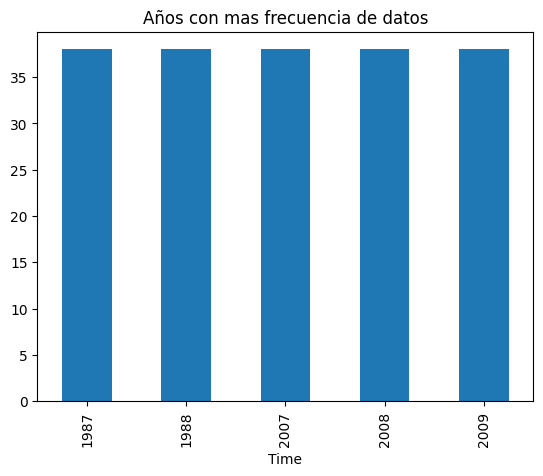

In [11]:
data["Time"].value_counts() \
    .head() \
    .plot(kind = "bar", title = "Años con mas frecuencia de datos") 

In [12]:
data["Country Name"].value_counts() 

Country Name
Argentina                36
Papua New Guinea         36
Nauru                    36
New Zealand              36
Nicaragua                36
Palau                    36
Panama                   36
Paraguay                 36
Peru                     36
Samoa                    36
Australia                36
Solomon Islands          36
Suriname                 36
Tonga                    36
Tuvalu                   36
United States            36
Uruguay                  36
Vanuatu                  36
Micronesia, Fed. Sts.    36
Mexico                   36
Marshall Islands         36
Kiribati                 36
Belize                   36
Bolivia                  36
Brazil                   36
Canada                   36
Chile                    36
Colombia                 36
Costa Rica               36
Cuba                     36
Ecuador                  36
El Salvador              36
Fiji                     36
Guatemala                36
Guyana                   36
Hondura

<Axes: title={'center': 'Países con mas frecuencia de datos'}, ylabel='Country Name'>

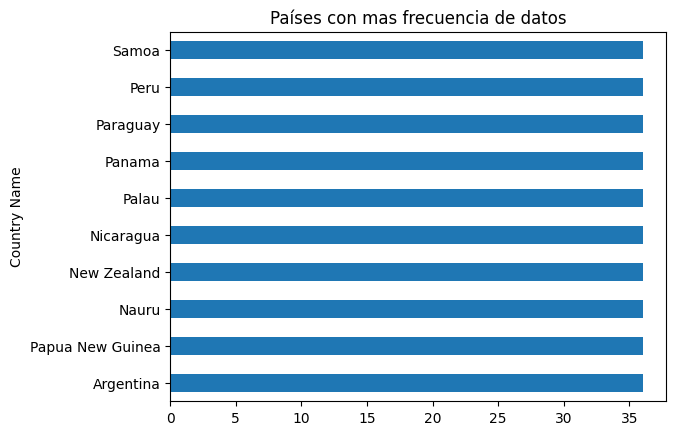

In [13]:
data["Country Name"].value_counts() \
    .head(10) \
    .plot(kind = "barh", title = "Países con mas frecuencia de datos") 

In [14]:
columns_names  = data.columns

In [15]:
duplicates_numbers = data.drop(labels = columns_names, axis =1).duplicated

In [16]:
data.describe(exclude="number")

,Country Name,Country Code
count,1368,1368
unique,38,38
top,Argentina,ARG
freq,36,36


In [17]:
data.describe()

,Time,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Fertility rate, total (births per woman)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality rate, infant (per 1,000 live births)",...,Urban population growth (annual %),Sex ratio at birth (male births per female births),"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP (current US$),GDP growth (annual %),"Immunization, DPT (% of children ages 12-23 months)","Immunization, measles (% of children ages 12-23 months)","Esperanza de vida saludable, total","Esperanza de vida saludable, hombres","Esperanza de vida saludable, mujeres"
count,1368.000000,1327.000000,1327.000000,1302.000000,1299.000000,1299.000000,1299.000000,1292.000000,1292.000000,1330.000000,...,1330.000000,1330.000000,1292.000000,1.283000e+03,1276.000000,1329.000000,1320.000000,720.000000,720.000000,720.000000
mean,2004.500000,24.014846,6.819668,3.099770,73.248884,67.587144,70.314858,140.569737,224.201625,25.050301,...,1.909624,1.059774,67.754257,4.861683e+11,2.766301,83.929270,84.227273,63.779306,62.374306,65.240417
std,10.392094,7.670603,1.677739,1.061459,6.005248,5.870891,5.935566,62.104884,81.372402,16.652338,...,1.378197,0.049054,27.802080,2.238422e+12,4.566697,14.072835,15.065835,4.523759,4.496269,4.670106
min,1987.000000,8.900000,3.800000,0.800000,46.300000,45.800000,46.000000,41.700000,73.000000,3.200000,...,-2.900000,1.000000,6.900000,8.824448e+06,-22.900000,16.000000,8.000000,29.000000,26.100000,32.400000
25%,1995.750000,17.700000,5.600000,2.200000,68.800000,63.400000,66.000000,92.275000,168.225000,13.400000,...,1.100000,1.000000,47.700000,8.213300e+08,0.800000,78.000000,78.000000,62.200000,60.500000,63.675000
50%,2004.500000,23.700000,6.700000,2.900000,73.700000,67.600000,70.500000,129.900000,216.800000,21.750000,...,1.800000,1.100000,69.650000,1.261460e+10,3.000000,88.000000,90.000000,64.700000,63.050000,66.500000
75%,2013.250000,30.100000,7.600000,3.900000,77.700000,71.700000,74.600000,179.825000,280.725000,32.200000,...,2.800000,1.100000,87.000000,8.608596e+10,5.000000,94.000000,95.000000,66.600000,65.200000,68.200000
max,2022.000000,46.400000,17.700000,6.600000,85.400000,81.300000,83.300000,482.200000,501.300000,108.200000,...,6.300000,1.100000,150.900000,2.331508e+13,43.500000,99.000000,99.000000,70.800000,70.000000,71.400000


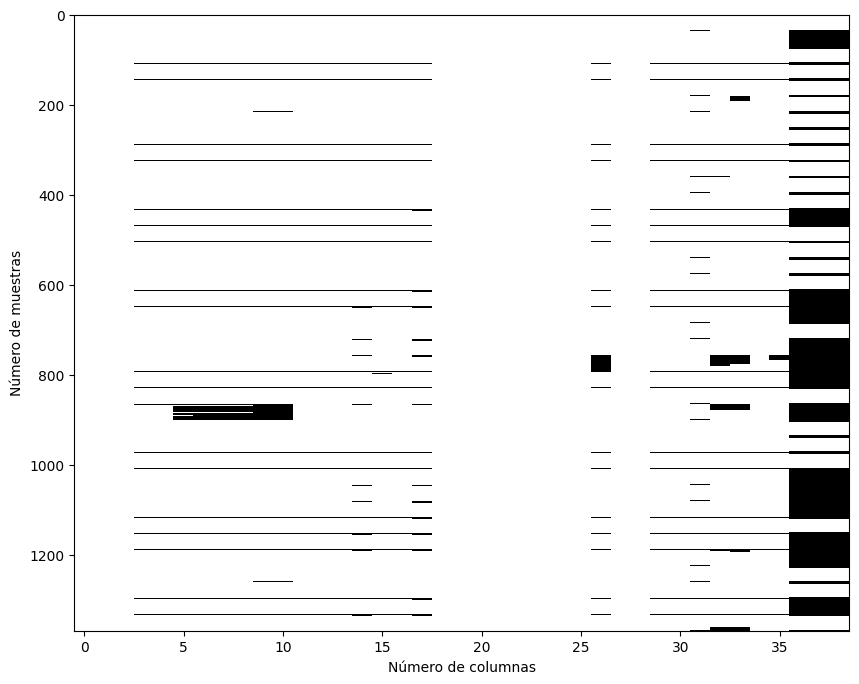

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect='auto', interpolation='nearest', cmap='Greys')
plt.xlabel("Número de columnas")
plt.ylabel("Número de muestras")
plt.show()

<Axes: title={'center': 'Porcentaje de valores faltanres por columna'}, ylabel='Relación de valores perdidos por columna'>

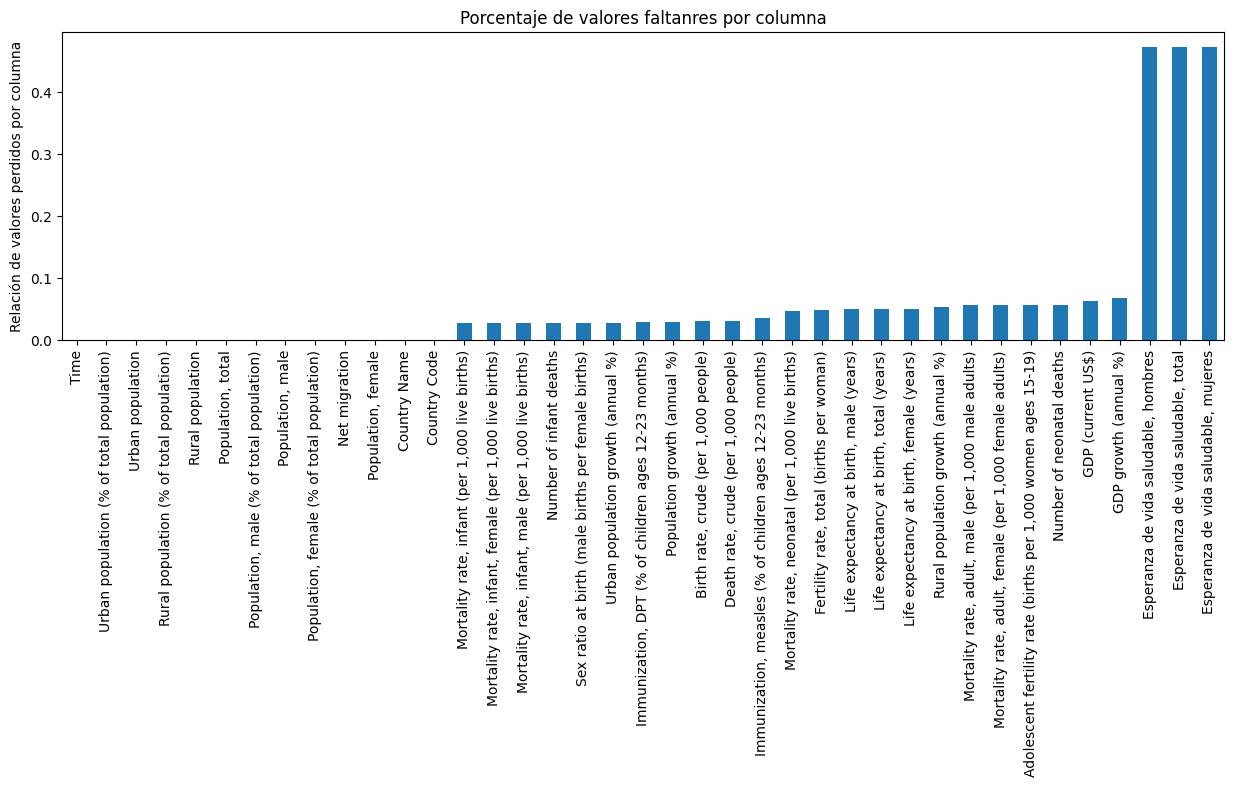

In [19]:
data.isna().mean().sort_values().plot(
    kind = "bar", figsize = (15,4),
    title = "Porcentaje de valores faltanres por columna",
    ylabel = "Relación de valores perdidos por columna")

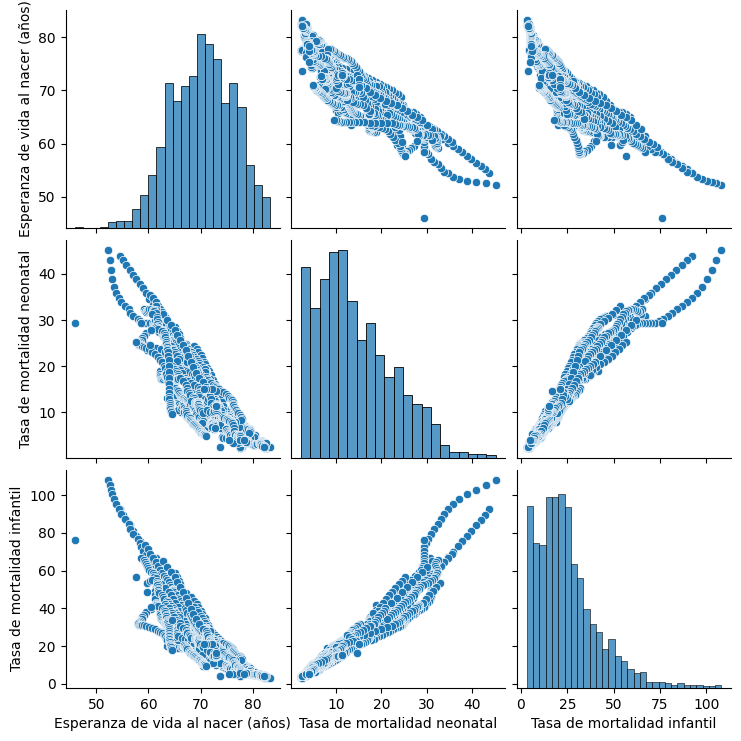

In [36]:


import seaborn as sns
import matplotlib.pyplot as plt

# Generar el pairplot
pairplot = sns.pairplot(data, vars=["Life expectancy at birth, total (years)",
                                    "Mortality rate, neonatal (per 1,000 live births)",
                                    "Mortality rate, infant (per 1,000 live births)"])
                                    #"Number of infant deaths"])

# Cambiar los nombres de los ejes
pairplot.axes[0, 0].set_ylabel("Esperanza de vida al nacer (años)")
pairplot.axes[1, 0].set_ylabel("Tasa de mortalidad neonatal")
pairplot.axes[2, 0].set_ylabel("Tasa de mortalidad infantil")
#pairplot.axes[3, 0].set_ylabel("Numero de muertes infantiles")




pairplot.axes[2, 0].set_xlabel("Esperanza de vida al nacer (años)")
pairplot.axes[2, 1].set_xlabel("Tasa de mortalidad neonatal")
pairplot.axes[2, 2].set_xlabel("Tasa de mortalidad infantil")
#pairplot.axes[2, 3].set_xlabel("Numero de muertes infantiles")
# Mostrar el pairplot
plt.show()



<Axes: >

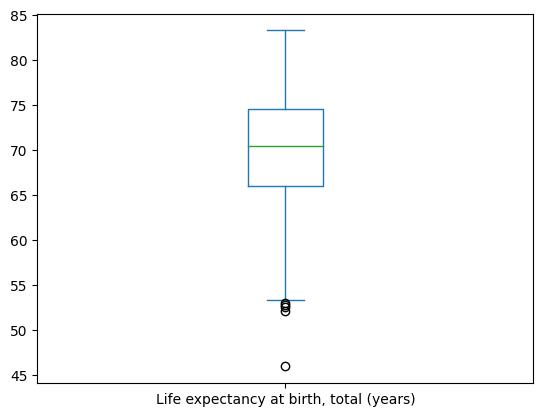

In [21]:
data["Life expectancy at birth, total (years)"].plot(kind = "box")

<AxesSubplot: >

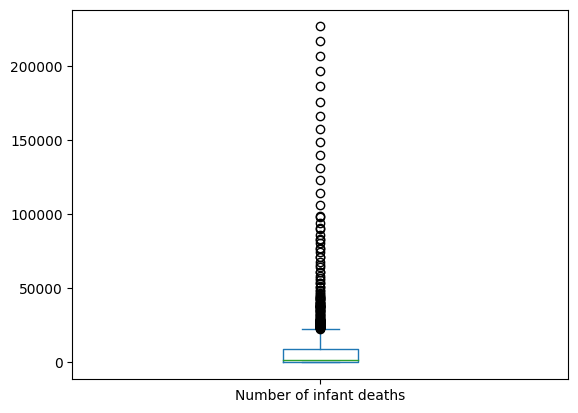

In [22]:
data["Number of infant deaths"].plot(kind = "box")

In [23]:
data[data["Number of infant deaths"] > 150000][["Time","Country Name","Number of infant deaths"]]

,Time,Country Name,Number of infant deaths
144,1987,Brazil,226814.0
145,1988,Brazil,216736.0
146,1989,Brazil,206798.0
147,1990,Brazil,196801.0
148,1991,Brazil,186652.0
149,1992,Brazil,176041.0
150,1993,Brazil,166243.0
151,1994,Brazil,157301.0


<AxesSubplot: >

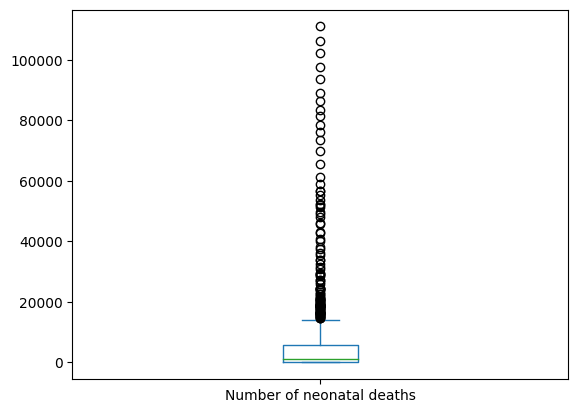

In [24]:
data["Number of neonatal deaths"].plot(kind = "box")

In [25]:
data[data["Number of neonatal deaths"] > 50000][["Time","Country Name","Number of neonatal deaths"]]

,Time,Country Name,Number of neonatal deaths
144,1987,Brazil,111043.0
145,1988,Brazil,106296.0
146,1989,Brazil,102123.0
147,1990,Brazil,97629.0
148,1991,Brazil,93591.0
149,1992,Brazil,89203.0
150,1993,Brazil,86367.0
151,1994,Brazil,83492.0
152,1995,Brazil,81370.0
153,1996,Brazil,78543.0


In [26]:
columns_correlation = data.iloc[:, 2:].columns

In [48]:
# Función para convertir a numérico o NaN
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except:
        return np.nan

# Aplicar la función convert_to_numeric a los valores no numéricos
data = data.applymap(convert_to_numeric)

In [49]:
#correlation = data.corr()

In [50]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Crear figura con tamaño personalizado
plt.figure(figsize=(40, 40))

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [82]:
#columns_correlation = [f"Columna {i+1}" for i in range(correlation.shape[1])]

In [85]:
columns_correlation = ["Mortality rate, infant, female (per 1,000 live births)",
"Sex ratio at birth (male births per female births)",
"GDP (current US$)",
"Number of infant deaths",
"Population growth (annual %)",
"Life expectancy at birth, male (years)" , 'Mortality rate, adult, female (per 1,000 female adults)',
'Mortality rate, adult, male (per 1,000 male adults)',
'Mortality rate, infant (per 1,000 live births)',
'Mortality rate, infant, male (per 1,000 live births)',
'Mortality rate, neonatal (per 1,000 live births)']

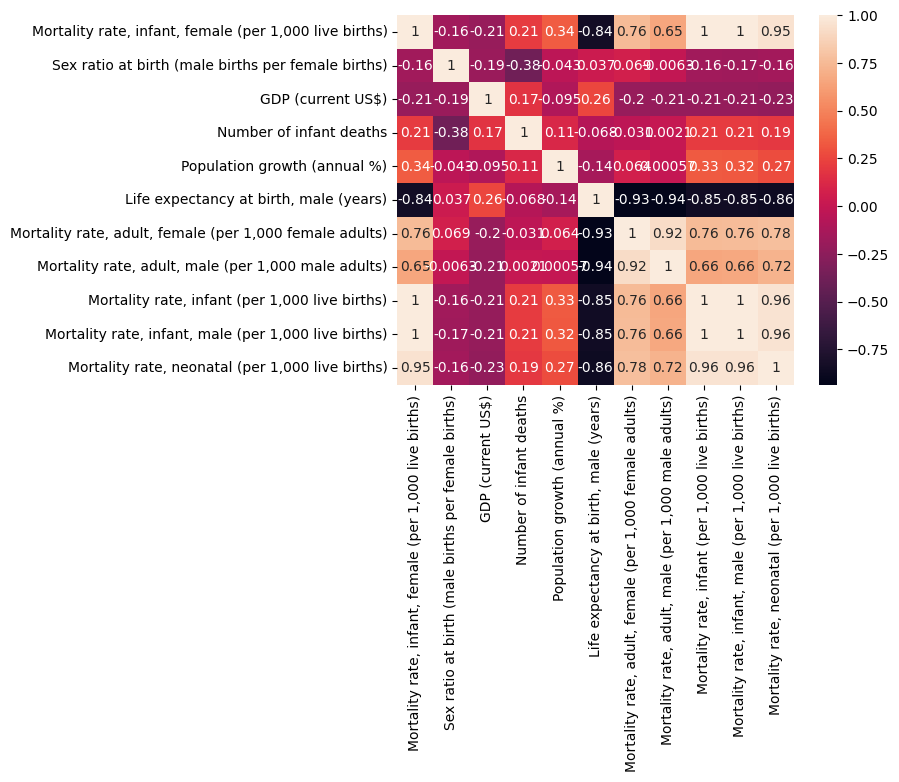

In [86]:
# Definir la matriz de correlación
correlation = data[columns_correlation].corr()

# Crear mapa de calor
sns.heatmap(correlation, xticklabels=columns_correlation, yticklabels=columns_correlation, annot=True)

# Mostrar el gráfico
plt.show()

In [69]:
# Datos de ejemplo
#correlation = np.random.rand(50,50)
#columns_correlation = [f"Columna {i+1}" for i in range(correlation.shape[1])]